<h2>Imports</h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

<h2>Helper functions</h2>

In [4]:
def hist(column):
    sns.distplot(df[column].dropna(), kde=False)
    plt.show()

In [5]:
def density(column):
    sns.distplot(df[column].dropna())
    plt.show()

In [6]:
def one_hot_encode(df, column):    
    for i in range(0, len(df[column].unique())):
        one_hot = df[column].unique()[i]
        df[str(column) + '_' + str(one_hot)] = list(np.array(df[column] == df[column].unique()[i]).astype(int))

In [7]:
def summarize(column):
    print(column)
    print("----------")
    print("Count:", df[column].count())
    print("NaN:", len(df[column]) - df[column].count())
    print("Min:", np.min(df[column].dropna()))
    print("Max:", np.max(df[column].dropna()))
    print("Mean:", np.mean(df[column].dropna()))
    print("Median:", np.median(df[column].dropna()))
    print("Std. dev.:", np.std(df[column]))

In [8]:
def survival_rates(column):
    print("Counts:")
    for c in df[column].unique():
        print("Class " + str(c) + ": " + str(sum(df[column]==c)))
    sns.barplot(x=df[column], y=df['Survived'])
    plt.show()

In [9]:
def df_without_label(label):
    new_df = df.copy()

    return new_df.drop(label, 1)

<h2>Summary</h2>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<h2>Categorical columns</h2>

Counts:
Class 3: 491
Class 1: 216
Class 2: 184


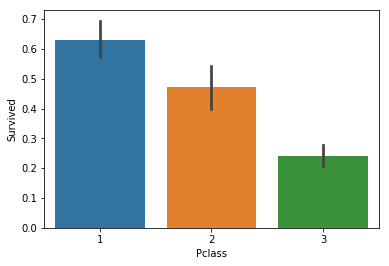

In [11]:
survival_rates('Pclass')

Counts:
Class male: 577
Class female: 314


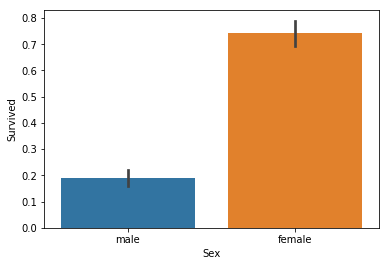

In [12]:
survival_rates('Sex')

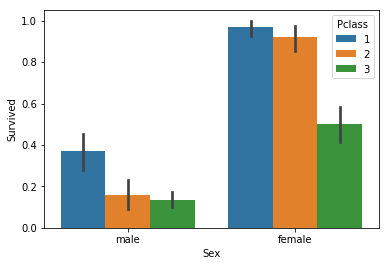

In [13]:
sns.barplot(x=df['Sex'], y=df['Survived'], hue=df['Pclass'])
plt.show()

Counts:
Class S: 644
Class C: 168
Class Q: 77
Class nan: 0


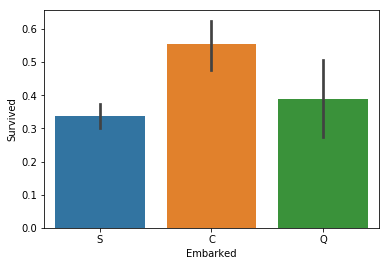

In [14]:
survival_rates('Embarked')

In [15]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


The embarked column has two missing values. We could build a model to predict where these two sampled individuals embarked from, but it would add very little value to our model as a whole, considering that it's only two samples. Let's do some simple detective work instead.

In [16]:
print("P(S|Class=1) =", df['Embarked'][(df['Pclass']==1) & (df['Embarked']=='S')].count()/df['Embarked'][df['Pclass']==1].count())
print("P(C|Class=1) =", df['Embarked'][(df['Pclass']==1) & (df['Embarked']=='C')].count()/df['Embarked'][df['Pclass']==1].count())
print("P(Q|Class=1) =", df['Embarked'][(df['Pclass']==1) & (df['Embarked']=='Q')].count()/df['Embarked'][df['Pclass']==1].count())

P(S|Class=1) = 0.593457943925
P(C|Class=1) = 0.397196261682
P(Q|Class=1) = 0.00934579439252


The prior probability of the passengers embarking from Southampton given that they were travelling 1st class is 60 %. Cherbourg is also likely, with 40 %. We will discard Queenstown as unlikely, with a prior probability of less than 1 %.

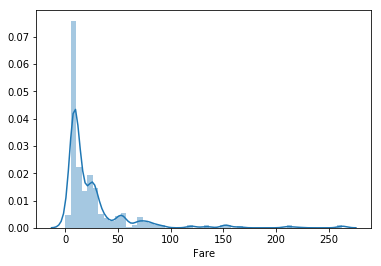

In [17]:
sns.distplot(df['Fare'][df['Embarked']=='S'])
plt.show()

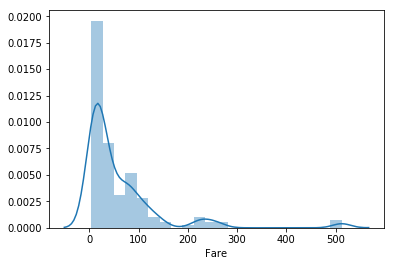

In [18]:
sns.distplot(df['Fare'][df['Embarked']=='C'])
plt.show()

The two passengers paid a fare of $80. The fare distributions for Southamption is on the lower end while Cherbourg is higher. Yet, we know that the prior probability for Southampton was higher.

In [19]:
df['PassengerId'][(df['Fare']>60) & (df['Fare']<100) & (df['Embarked']=='S')].count()

39

In [20]:
df['PassengerId'][(df['Fare']>60) & (df['Fare']<100) & (df['Embarked']=='C')].count()

26

Indeed, we see that there were in fact more passengers embarking from Southampton that payed a fare between 60 and 100 dollars than from Cherbourg. Finally, let's see if the ticket number reveals something. Their ticket number was 113572.

In [21]:
df['Ticket'][(df['Embarked']=='C') & (df['Ticket']>'100000') & (df['Ticket']<'200000')].dropna()

54     113509
174     17764
209    112277
218     11813
291     11967
306     17421
310     11767
319     16966
329    111361
337     16966
366    110813
370     11765
377    113503
452    113051
453     17453
484     11967
487     11771
523    111361
539     13568
550     17421
556     11755
581     17421
583     13049
587     13567
604    111426
632     13214
647     13213
698     17421
766    112379
839     11774
842    113798
849     17453
879     11767
889    111369
Name: Ticket, dtype: object

In [22]:
df['Ticket'][(df['Embarked']=='S') & (df['Ticket']>'100000') & (df['Ticket']<'200000')].dropna()

3      113803
6       17463
11     113783
23     113788
27      19950
35     113789
41      11668
55      19947
74       1601
83     113059
88      19950
110    110465
117     11668
136     11752
137    113803
151    113776
166    113505
169      1601
170    111240
185    113767
187    111428
224     19943
248     11751
252    113514
257    110152
262    110413
263    112059
270    113798
275     13502
284    113056
        ...  
669     19996
690     17474
692      1601
694    113800
708    113781
711    113028
712     19996
722     12233
724    113806
740     16988
741     19877
748    113773
759    110152
763    113760
765     13502
781     17474
782    113501
796     17465
802    113760
806    112050
809    113806
815    112058
820     12749
822     19972
826      1601
838      1601
857    113055
862     17466
871     11751
887    112053
Name: Ticket, Length: 104, dtype: object

There are plenty of ticket numbers around 113500 from both embarkation points, so that doesn't help. We're still going to go with Southampton as the imputed value.

In [23]:
df ['Embarked'] = df['Embarked'].fillna('S')
df_test ['Embarked'] = df_test['Embarked'].fillna('S')

<h3>One-hot encoding</h3>
It seems pretty clear that class, gender and point of embarkation all contain good predictive power. Given that these are categorical values with very few unique categories and that we now have no missing values, we simply one-hot encode the columns, and we're done!

In [24]:
one_hot_encode(df, 'Sex')
one_hot_encode(df_test, 'Sex')

In [25]:
one_hot_encode(df, 'Pclass')
one_hot_encode(df_test, 'Pclass')

In [26]:
one_hot_encode(df, 'Embarked')
one_hot_encode(df_test, 'Embarked')

In [27]:
features = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_S', 'Embarked_C', 'Embarked_Q']

<h2>Families</h2>

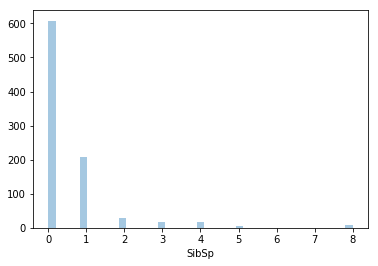

In [28]:
hist('SibSp')

Counts:
Class 1: 209
Class 0: 608
Class 3: 16
Class 4: 18
Class 2: 28
Class 5: 5
Class 8: 7


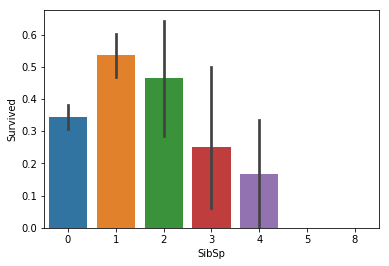

In [29]:
survival_rates('SibSp')

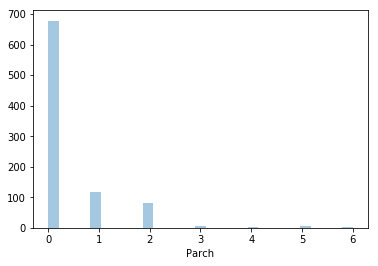

In [30]:
hist('Parch')

Counts:
Class 0: 678
Class 1: 118
Class 2: 80
Class 5: 5
Class 3: 5
Class 4: 4
Class 6: 1


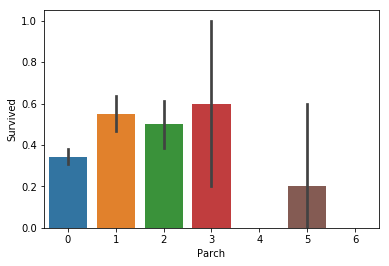

In [31]:
survival_rates('Parch')

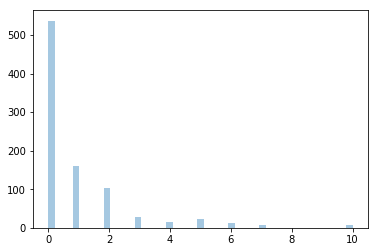

In [32]:
sns.distplot(df['SibSp'].dropna() + df['Parch'].dropna(), kde=False)
plt.show()

Counts:
0 family members: 537
1 family members: 161
2 family members: 102
3 family members: 29
4 family members: 15
5 family members: 22
6 family members: 12
7 family members: 6
8 family members: 0
9 family members: 0
10 family members: 7


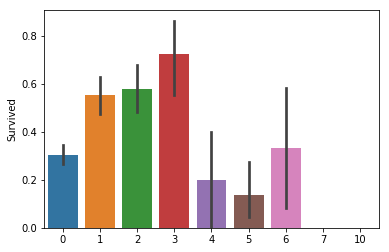

In [33]:
print("Counts:")
for i in range(11):
    print(str(i) + " family members:", df['PassengerId'][df['SibSp']+df['Parch']==i].count())
sns.barplot(x=df['SibSp']+df['Parch'], y=df['Survived'])
plt.show()

In [34]:
np.mean(df['Survived'][df['SibSp']+df['Parch']>3])

0.16129032258064516

The survival rate for single travellers is 30 %, while the survival rate for passenger travelling with 1 to 3 family members is around 60%. However, the survival rate among the 56 passengers travelling with 4 or more family members is an abysmal 16 %. Looking at the bar chart above, this is a pretty clear trend. Thus, it makes sense to categorize everyone into three broad family classes: 0, 1-3 and 4+. This will help prevent overfitting.

In [35]:
df['Family_no'] = (df['SibSp']+df['Parch']==0).astype(int)
df_test['Family_no'] = (df_test['SibSp']+df_test['Parch']==0).astype(int)

In [36]:
df['Family_small'] = ((df['SibSp']+df['Parch']>0)&(df['SibSp']+df['Parch']<4)).astype(int)
df_test['Family_small'] = ((df_test['SibSp']+df_test['Parch']>0)&(df_test['SibSp']+df_test['Parch']<4)).astype(int)

In [37]:
df['Family_large'] = (df['SibSp']+df['Parch']>3).astype(int)
df_test['Family_large'] = (df_test['SibSp']+df_test['Parch']>3).astype(int)

In [38]:
features.append('Family_no')
features.append('Family_small')
features.append('Family_large')

<h2>Age</h2>

The age column has 177 missing values that need some sort of imputation.

The survival rate is pretty similar for most age groups, although it's notably higher for young kids and slightly lower for old people. As we can see in the box plot, the median age is exactly the same for both survivors and non-survivors.

In [39]:
summarize('Age')

Age
----------
Count: 714
NaN: 177
Min: 0.42
Max: 80.0
Mean: 29.69911764705882
Median: 28.0
Std. dev.: 14.516321150817317


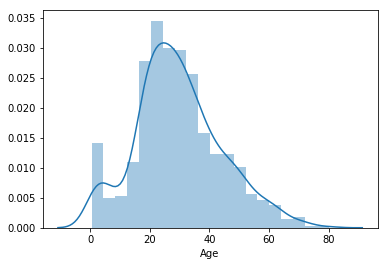

In [40]:
density('Age')

0 - 10: 62
10 - 20: 100
20 - 30: 205
30 - 40: 142
40 - 50: 76
50 - 60: 38
60 - 70: 15
70 - 80: 4


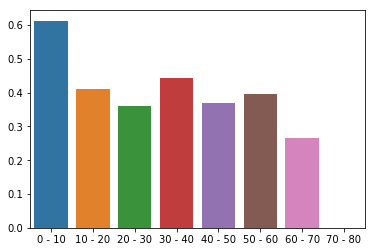

In [41]:
age_groups = []
surviverates = []
for i in range(8):
    age_groups.append(str(i*10) + " - " + str(10 + (i*10)))
    surviverates.append(np.mean(df['Survived'][(df['Age']>(i*10)) & (df['Age']<(10 + (i*10)))]))
    print(str(i*10) + " - " + str(10 + (i*10)) + ":", df['Survived'][(df['Age']>(i*10)) & (df['Age']<(10 + (i*10)))].count())
    
sns.barplot(x=age_groups, y=surviverates)
plt.show()

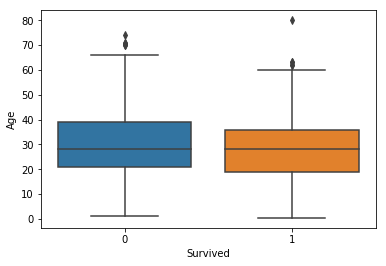

In [42]:
sns.boxplot(x="Survived", y="Age", data=df)
plt.show()

In [43]:
print("Survivors median age:", np.median(df['Age'][df['Survived']==1].dropna()))
print("Non-survivors median age:", np.median(df['Age'][df['Survived']==0].dropna()))

Survivors median age: 28.0
Non-survivors median age: 28.0


<h3>Age imputation</h3>
We will build a simple regressor to impute the missing age values. We will try both random forest regression and Lasso regression.

In [44]:
from sklearn.ensemble import RandomForestRegressor, VotingClassifier
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

In [45]:
age_df = df[df['Age'].notnull()]
age_df_test = df_test[df_test['Age'].notnull()]

In [46]:
impute_age_df = df[df['Age'].isnull()]
impute_age_df_test = df_test[df_test['Age'].isnull()]

In [47]:
features = ['Fare', 'Family_no', 'Family_small', 'Family_large', 'Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_S', 'Embarked_Q', 'Embarked_C']

In [48]:
X = age_df[features].as_matrix()
Y = age_df['Age'].as_matrix()
X_train = X[:600]
Y_train = Y[:600]
X_test = X[601:]
Y_test = Y[601:]
X_missing = impute_age_df[features].as_matrix()
Y_missing = impute_age_df['Age'].as_matrix()

Xt = age_df_test[features].as_matrix()
Yt = age_df_test['Age'].as_matrix()
X_missingt = impute_age_df_test[features].as_matrix()
Y_missingt = impute_age_df_test['Age'].as_matrix()

In [49]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
lasso = linear_model.Lasso(alpha = 0.1)

In [50]:
rf.fit(X_train,Y_train)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
median_absolute_error(rf.predict(X_test),Y_test)

9.7327857142857148

In [52]:
median_absolute_error(lasso.predict(X_test),Y_test)

9.0886732810173108

In [53]:
np.sqrt(mean_squared_error(rf.predict(X_test),Y_test))

15.907788922558055

In [54]:
np.sqrt(mean_squared_error(lasso.predict(X_test),Y_test))

13.454388569327248

In [55]:
median_absolute_error(np.array([28]*113), Y_test)

10.0

The results are pretty terrible. Lasso regression was only able to outperform a simple median guess ever so slightly. Random forest regression was only a little bit better. Its median miss is almost 9 years. Nevertheless, we will retrain the model on all the labeled samples and use the predictions as imputation values. However, we will create a column 'Age_impute' to indicate where values were imputed. Hopefully, our final model can pick up the pattern of inaccuracy in imputed age values.

In [56]:
rf.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [57]:
df['Age_imputed'] = df['Age'].isnull().astype(int)
df_test['Age_imputed'] = df_test['Age'].isnull().astype(int)

In [58]:
df['Age'][df['Age'].isnull()] = np.round(rf.predict(X_missing),2)
df_test['Age'][df_test['Age'].isnull()] = np.round(rf.predict(X_missingt),2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [59]:
features.append('Age')
features.append('Age_imputed')

<h2>Fare</h2>

In [60]:
summarize('Fare')

Fare
----------
Count: 891
NaN: 0
Min: 0.0
Max: 512.3292
Mean: 32.2042079685746
Median: 14.4542
Std. dev.: 49.66553444477411


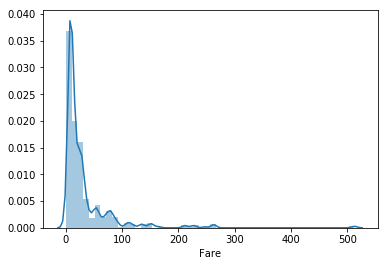

In [61]:
density('Fare')

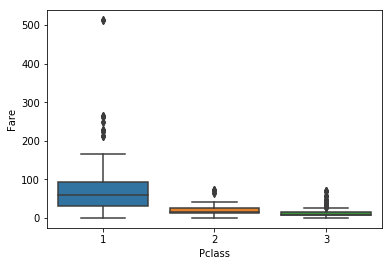

In [62]:
sns.boxplot(x="Pclass", y="Fare", data=df)
plt.show()

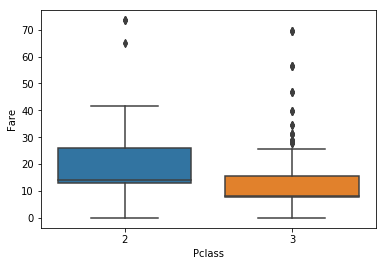

In [63]:
sns.boxplot(x="Pclass", y="Fare", data=df[df['Pclass']>1])
plt.show()

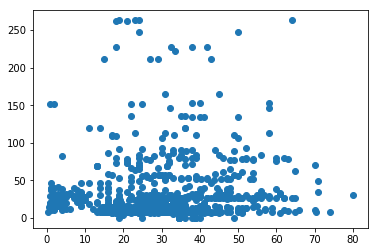

In [64]:
plt.scatter(df['Age'][df['Fare']<300], df['Fare'][df['Fare']<300])
plt.show()

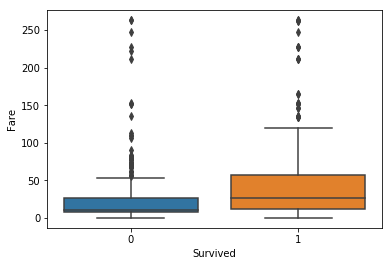

In [65]:
sns.boxplot(x="Survived", y="Fare", data=df[df['Fare']<300])
plt.show()

We see that the survivors clearly payed higher fares overall. This is not surprising, as the fare is highly correlated with passenger class, which was also shown to be a good predictor of survival. One outlier is not shown in the box plot.

There are no missing values in the fare column, so we will use it as is for the time being.

In [66]:
features.append('Fare')

<h2>Passenger ID</h2>

Using the passenger ID as a feature would be ridiculous, right? Not necessarily. We don't know whether the passengers were sampled completely at random or in some non-random order. Let's plot survival rates by groups of passenger IDs and let's try to find out.

0 - 100: 99
100 - 200: 0
200 - 300: 0
300 - 400: 0
400 - 500: 0
500 - 600: 0
600 - 700: 0
700 - 800: 0
800 - 900: 0


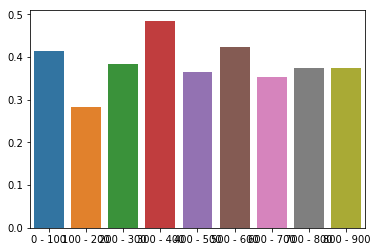

In [67]:
id_groups = []
surviverates = []
for i in range(9):
    id_groups.append(str(i*100) + " - " + str(100 + (i*100)))
    surviverates.append(np.mean(df['Survived'][(df['PassengerId']>(i*100)) & (df['PassengerId']<(100 + (i*100)))]))
    print(str(i*100) + " - " + str(100 + (i*100)) + ":", df['Survived'][(df['Age']>(i*100)) & (df['PassengerId']<(100 + (i*100)))].count())
    
sns.barplot(x=id_groups, y=surviverates)
plt.show()

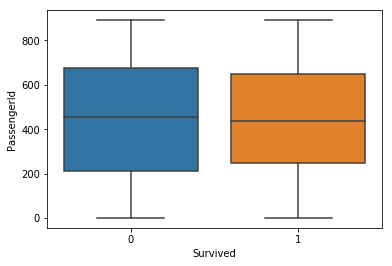

In [68]:
sns.boxplot(x="Survived", y="PassengerId", data=df[df['Fare']<300])
plt.show()

There are some hints of correlation, but it looks thin. Nevertheless, we will include the feature and check it for importance. Perhaps combining it with the other features will disclose hidden patterns.

In [69]:
features.append('PassengerId')

<h2>Cabin</h2>
The cabin column has mostly missing values. Additionally, almost every cabin is unique. One-hot encoding each of them as a feature would simply lead to gross overfitting. However, we notice that each cabin starts with a letter, which probably corresponds to the location on the ship. This could prove interesting.

In [70]:
df['Cabin_letters'] = [c[0] for c in df['Cabin'].astype(str)]
df_test['Cabin_letters'] = [c[0] for c in df_test['Cabin'].astype(str)]

Counts:
Class n: 687
Class C: 59
Class E: 32
Class G: 4
Class D: 33
Class A: 15
Class B: 47
Class F: 13
Class T: 1


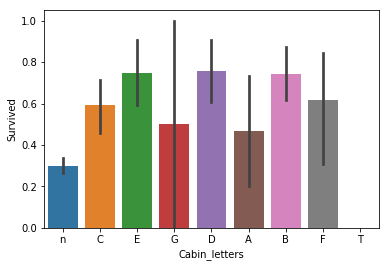

In [71]:
survival_rates('Cabin_letters')

In [72]:
np.mean(df['Survived'][df['Cabin_letters']!='n'])

0.6666666666666666

In [73]:
np.mean(df['Survived'][df['Cabin_letters']=='n'])

0.29985443959243085

Here we see something interesting. The survival rates for different cabin types are unreliable, but hover around 50-70 %. However, the survival rate for samples with missing cabin values is only at 30 %. This probably means that those individuals didn't have a cabin, which lead to lower likelihood of survival. Our best bet here is probably to construct a simple boolean feature which indicates cabin or no cabin. This keeps the model simple.

<h3>Transformation:</h3>

In [74]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)
df_test['HasCabin'] = df_test['Cabin'].notnull().astype(int)

In [75]:
features.append('HasCabin')

<h2>Ticket</h2>
The ticket column doesn't have missing values, but is trickier, because the format varies a lot.

In [76]:
df['Ticket_lengths'] = [len(t) for t in df['Ticket']]
df_test['Ticket_lengths'] = [len(t) for t in df_test['Ticket']]

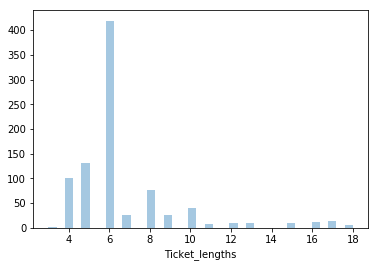

In [77]:
hist('Ticket_lengths')

Counts:
Class 9: 26
Class 8: 76
Class 16: 11
Class 6: 419
Class 5: 131
Class 7: 27
Class 4: 101
Class 10: 41
Class 13: 10
Class 15: 9
Class 12: 10
Class 11: 8
Class 17: 14
Class 18: 6
Class 3: 2


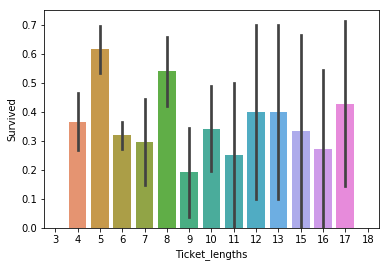

In [78]:
survival_rates('Ticket_lengths')

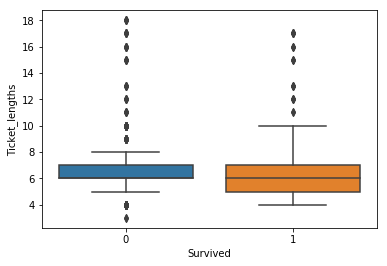

In [79]:
sns.boxplot(x="Survived", y="Ticket_lengths", data=df[df['Fare']<300])
plt.show()

In theory, the length of the ticket number could hold some important information, but this doesn't look promising. I'm very reluctant to include this feature.

<h2>Name</h2>
We have already incorporated the genders of every passenger into our model, so that information doesn't necessarily reveal much. However, every name comes with a title. That could be interesting information.

<h3>Title</h3>

In [80]:
df['Title'] = [x.split(',')[1].split(' ')[1] for x in df['Name']]
df_test['Title'] = [x.split(',')[1].split(' ')[1] for x in df_test['Name']]

Counts:
Class Mr.: 517
Class Mrs.: 125
Class Miss.: 182
Class Master.: 40
Class Don.: 1
Class Rev.: 6
Class Dr.: 7
Class Mme.: 1
Class Ms.: 1
Class Major.: 2
Class Lady.: 1
Class Sir.: 1
Class Mlle.: 2
Class Col.: 2
Class Capt.: 1
Class the: 1
Class Jonkheer.: 1


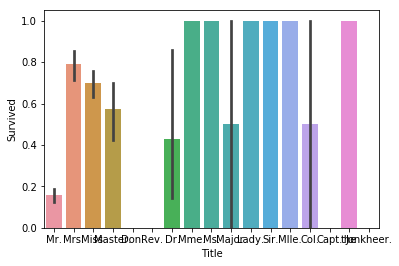

In [81]:
survival_rates('Title')

We have a bit too fine-grained information here. The Mr. group is the largest and clearly has a lower survival rate. Female titles have higher survival rates. Other titles also seem to have higher survival rates, but there are few data points. We will group them into three categories.

In [82]:
df['Mr'] = [int(x=='Mr.') for x in df['Title']]
df_test['Mr'] = [int(x=='Mr.') for x in df_test['Title']]

In [83]:
df['Ms'] = [int((x=='Mrs.') or (x=='Miss.') or (x=='Ms.')) for x in df['Title']]
df_test['Ms'] = [int((x=='Mrs.') or (x=='Miss.') or (x=='Ms.')) for x in df_test['Title']]

In [84]:
df['Other_title'] = [int(x not in ['Mr.', 'Miss.', 'Ms.', 'Mrs.']) for x in df['Title']]
df_test['Other_title'] = [int(x not in ['Mr.', 'Miss.', 'Ms.', 'Mrs.']) for x in df_test['Title']]

In [85]:
np.mean(df['Survived'][df['Mr']==1])

0.15667311411992263

In [86]:
np.mean(df['Survived'][df['Ms']==1])

0.737012987012987

In [87]:
np.mean(df['Survived'][df['Other_title']==1])

0.5151515151515151

Indeed, we find a clear difference between the three groups.

In [88]:
features.append('Mr')
features.append('Ms')
features.append('Other_title')

<h3>Nationality</h3>
Most of the passengers were British or American. Another large group was Scandinavians, which often have names ending in 'sen' or 'son'. Indeed, we find 117 such instances. Let's use that.

In [89]:
sum([('sen' in x) or ('son' in x) for x in df['Name']])

117

In [90]:
df['Scandinavian'] = [int(('sen' in x) or ('son' in x)) for x in df['Name']]
df_test['Scandinavian'] = [int(('sen' in x) or ('son' in x)) for x in df_test['Name']]

In [91]:
np.mean(df['Survived'][df['Scandinavian']==1])

0.3162393162393162

In [92]:
features.append('Scandinavian')

In [93]:
len(features)

21

In [94]:
df[features].head()

,Fare,Family_no,Family_small,Family_large,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_S,...,Embarked_C,Age,Age_imputed,Fare,PassengerId,HasCabin,Mr,Ms,Other_title,Scandinavian
0,7.2500,0,1,0,1,0,0,0,1,1,...,0,22.0,0,7.2500,1,0,1,0,0,0
1,71.2833,0,1,0,0,1,1,0,0,0,...,1,38.0,0,71.2833,2,1,0,1,0,0
2,7.9250,1,0,0,0,1,0,0,1,1,...,0,26.0,0,7.9250,3,0,0,1,0,0
3,53.1000,0,1,0,0,1,1,0,0,1,...,0,35.0,0,53.1000,4,1,0,1,0,0
4,8.0500,1,0,0,1,0,0,0,1,1,...,0,35.0,0,8.0500,5,0,1,0,0,0


<h2>Machine learning</h2>

In [96]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [98]:
classifiers = {
    # "XGBoost": xgb.XGBClassifier(learning_rate=0.26, n_estimators=21)
    "Random Forest": RandomForestClassifier(n_estimators=25)
    ,"AdaBoost": AdaBoostClassifier()
    ,"Naive Bayes": GaussianNB()
    ,"Linear SVM": SVC(kernel="linear", C=0.025, probability=True)
    ,"Gaussian SVM": SVC(gamma=2, C=1, probability=True)
    ,"k-Nearest Neighbors": KNeighborsClassifier(3)
    }

In [99]:
voter = VotingClassifier(estimators=[(key, value) for x in classifiers.items()], voting='soft')

NameError: name 'key' is not defined

In [100]:
classifiers = {
    #"XGBoost": xgb.XGBClassifier(learning_rate=0.26, n_estimators=21)
    "Random Forest": RandomForestClassifier(n_estimators=25)
    ,"AdaBoost": AdaBoostClassifier()
    ,"Logistic Regression": LogisticRegression(random_state=1)
    ,"Naive Bayes": GaussianNB()
    #,"Linear SVM": SVC(kernel="linear", C=0.025, probability=True)
    #,"Gaussian SVM": SVC(gamma=2, C=1, probability=True)
    #,"k-Nearest Neighbors": KNeighborsClassifier(3)
    #,"Voting ensemble": voter
    }

In [105]:
X = df[features].as_matrix()
Y = df['Survived'].as_matrix()

In [106]:
X_train = X[:600]
Y_train = Y[:600]
X_test = X[601:]
Y_test = Y[601:]

In [107]:
for key, value in classifiers.items():
    scores = cross_val_score(value, X, Y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), key))

Accuracy: 0.81 (+/- 0.03) [Random Forest]
Accuracy: 0.75 (+/- 0.07) [AdaBoost]
Accuracy: 0.82 (+/- 0.01) [Logistic Regression]
Accuracy: 0.81 (+/- 0.02) [Naive Bayes]


In [108]:
for key, value in classifiers.items():
    print("Fitting " + key + " classifier...")
    value.fit(X_train, Y_train)

Fitting Random Forest classifier...
Fitting AdaBoost classifier...
Fitting Logistic Regression classifier...
Fitting Naive Bayes classifier...


In [109]:
from sklearn.feature_selection import SelectFromModel

In [110]:
from sklearn.metrics import roc_curve, auc, accuracy_score

In [111]:
def plot_roc_curves(classifiers, X, Y):
    plt.figure()
    for key, value in classifiers.items():
        fpr, tpr, thresholds = roc_curve(Y, value.predict_proba(X)[:,1])
        roc_auc = auc(fpr, tpr)
        acc = accuracy_score(Y, value.predict(X))
        print(key + " AUC: " + str(roc_auc) + " Accuracy: " + str(acc))
        plt.plot(fpr, tpr, lw=2, label=key + ' (AUC: %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", prop={'size': 8})
    plt.show()

Random Forest AUC: 0.848468468468 Accuracy: 0.813793103448
AdaBoost AUC: 0.88296010296 Accuracy: 0.837931034483
Logistic Regression AUC: 0.880154440154 Accuracy: 0.824137931034
Naive Bayes AUC: 0.891634491634 Accuracy: 0.824137931034


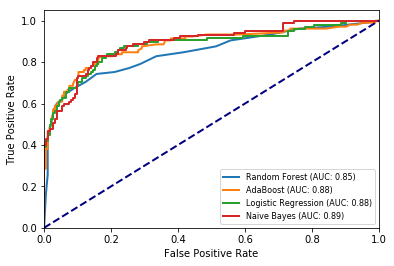

In [112]:
plot_roc_curves(classifiers, X_test, Y_test)

The cross-validation scores are very good. The best model is unsurprisingly XGBoost, with an accuracy of 0.855 and area under curve (AUC) of 0.912. More surprising is the fact that the Naive Bayes model is second best in terms of AUC, although its accuracy is significantly lower.

Finally, we train the best model again on the entire training set.

In [577]:
xg = xgb.XGBClassifier()
xg.fit(X,Y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [114]:
for key, value in classifiers.items():
    print("Fitting " + key + " classifier...")
    value.fit(X, Y)

Fitting Random Forest classifier...
Fitting AdaBoost classifier...
Fitting Logistic Regression classifier...
Fitting Naive Bayes classifier...


In [115]:
X_final = df_test[features].as_matrix()

In [116]:
preds = pd.DataFrame(df_test['PassengerId'])

In [155]:
for key, value in classifiers.items():
    print("Predicting with " + key + " classifier...")
    preds[key] = value.predict_proba(X_final)[:,1]

Predicting with Random Forest classifier...
Predicting with AdaBoost classifier...
Predicting with Logistic Regression classifier...
Predicting with Naive Bayes classifier...


In [156]:
preds['blend'] = (preds['Random Forest'] + 2*preds['AdaBoost'] + 2*preds['Logistic Regression'] + 2*preds['Naive Bayes'])/7

In [157]:
preds['predict'] = (preds['blend'] > 0.5).astype(int)

In [158]:
submission = pd.DataFrame()
submission['PassengerId'] = df_test['PassengerId']
submission['Survived'] = preds['predict']
submission.to_csv('submission.csv', index=False)

In [154]:
classifiers['AdaBoost'].predict_proba(X_final)

array([[ 0.50845568,  0.49154432],
       [ 0.49978064,  0.50021936],
       [ 0.50656873,  0.49343127],
       [ 0.50935792,  0.49064208],
       [ 0.49533583,  0.50466417],
       [ 0.50935792,  0.49064208],
       [ 0.49273194,  0.50726806],
       [ 0.50435968,  0.49564032],
       [ 0.49084437,  0.50915563],
       [ 0.50747764,  0.49252236],
       [ 0.50850209,  0.49149791],
       [ 0.50791201,  0.49208799],
       [ 0.479324  ,  0.520676  ],
       [ 0.50468815,  0.49531185],
       [ 0.4846181 ,  0.5153819 ],
       [ 0.48670336,  0.51329664],
       [ 0.50619387,  0.49380613],
       [ 0.50661444,  0.49338556],
       [ 0.49300288,  0.50699712],
       [ 0.49410125,  0.50589875],
       [ 0.50332614,  0.49667386],
       [ 0.50714426,  0.49285574],
       [ 0.48684318,  0.51315682],
       [ 0.49981854,  0.50018146],
       [ 0.4887484 ,  0.5112516 ],
       [ 0.51461066,  0.48538934],
       [ 0.47743945,  0.52256055],
       [ 0.50661444,  0.49338556],
       [ 0.49924632,

In [120]:
X_final.shape

(418, 21)

In [139]:
np.any(np.isnan(X_final))

False

In [137]:
X_final[152][0] = 0
X_final[152][14] = 0

In [123]:
X_final

array([[  7.8292,   1.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  7.    ,   0.    ,   1.    , ...,   1.    ,   0.    ,   0.    ],
       [  9.6875,   1.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       ..., 
       [  7.25  ,   1.    ,   0.    , ...,   0.    ,   0.    ,   1.    ],
       [  8.05  ,   1.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [ 22.3583,   0.    ,   1.    , ...,   0.    ,   1.    ,   0.    ]])

In [736]:
def submit(predictor):
    submission = pd.DataFrame()
    submission['PassengerId'] = df_test['PassengerId']
    submission['Survived'] = predictor.predict(X_final)
    submission.to_csv('submission.csv', index=False)

<h2>Feature selection</h2>

In [854]:
importances = pd.DataFrame()
importances['Feature'] = features
importances['Importance'] = classifiers['XGBoost'].feature_importances_

In [855]:
importances.sort_values('Importance', ascending=False)

,Feature,Importance
13,Fare,0.226950
11,Age,0.205674
14,PassengerId,0.198582
0,Sex_male,0.056738
15,HasCabin,0.056738
4,Pclass_3,0.056738
16,Mr,0.042553
10,Family_large,0.042553
19,Scandinavian,0.042553
9,Family_small,0.021277


In [872]:
df_select = df[features].drop(['Sex_female', 'Age_imputed', 'Pclass_2', 'Pclass_1', 'Ms', 'Other_title', 'Embarked_Q', 'Embarked_C', 'Family_no'],1)

In [873]:
X_select = df_select.as_matrix()
X_select_train = X_select[:600]
X_select_test = X_select[601:]

In [874]:
for key, value in classifiers.items():
    print("Fitting " + key + " classifier...")
    value.fit(X_select_train, Y_train)

Fitting XGBoost classifier...
Fitting Random Forest classifier...
Fitting Voting ensemble classifier...
Fitting AdaBoost classifier...
Fitting Naive Bayes classifier...
Fitting Logistic Regression classifier...


XGBoost AUC: 0.905070785071 Accuracy: 0.858620689655
Random Forest AUC: 0.882496782497 Accuracy: 0.834482758621
Voting ensemble AUC: 0.893075933076 Accuracy: 0.834482758621
AdaBoost AUC: 0.871196911197 Accuracy: 0.365517241379
Naive Bayes AUC: 0.893075933076 Accuracy: 0.834482758621
Logistic Regression AUC: 0.880617760618 Accuracy: 0.831034482759


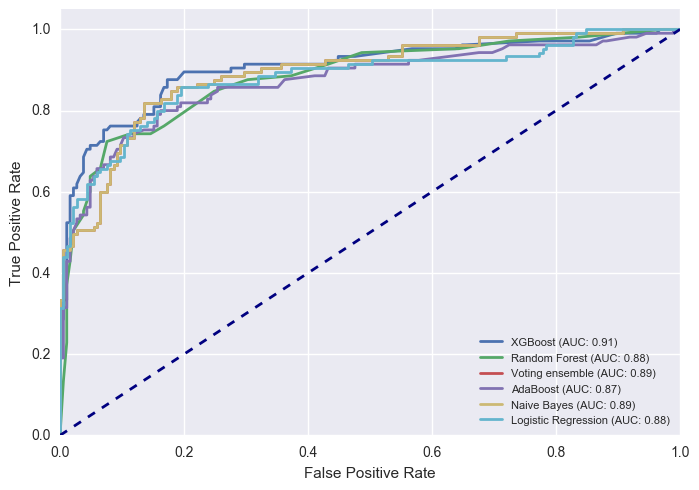

In [875]:
plot_roc_curves(classifiers, X_select_test, Y_test)

In [877]:
X_select_final = df_test[features].drop(['Sex_female', 'Age_imputed', 'Pclass_2', 'Pclass_1', 'Ms', 'Other_title', 'Embarked_Q', 'Embarked_C', 'Family_no'],1).as_matrix()

In [880]:
xg = xgb.XGBClassifier()
xg.fit(X_select,Y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [881]:
submission = pd.DataFrame()
submission['PassengerId'] = df_test['PassengerId']
submission['Survived'] = xg.predict(X_select_final)
submission.to_csv('D:\\ML\\Titanic\\submission.csv', index=False)

<h2>Hyperparameter tuning</h2>

In [720]:
m = []

lr = 0.3
n = 100

for lr in range(1, 41):
    for n in range(1,201,10):
        xg = xgb.XGBClassifier(learning_rate=lr/100, n_estimators=n)
        xg.fit(X_train,Y_train)

        fpr, tpr, thresholds = roc_curve(Y_test, xg.predict_proba(X_test)[:,1])
        roc_auc = auc(fpr, tpr)
        acc = accuracy_score(Y_test, xg.predict(X_test))
        results = [lr, n, roc_auc, acc]
        m.append(results)

In [721]:
m_df = pd.DataFrame(m)

In [722]:
m_df.columns = ['eta', 'estimators', 'AUC', 'Acc']

In [723]:
m_df['Combined'] = m_df['AUC']+m_df['Acc']

In [724]:
m_df.sort_values(['Combined'], ascending=False).head()

,eta,estimators,AUC,Acc,Combined
402,21,21,0.905277,0.865517,1.770794
502,26,21,0.911789,0.855172,1.766961
190,10,101,0.900746,0.865517,1.766264
504,26,41,0.910219,0.855172,1.765391
662,34,21,0.905997,0.858621,1.764618


In [725]:
m_df.sort_values(['AUC'], ascending=False).head()

,eta,estimators,AUC,Acc,Combined
502,26,21,0.911789,0.855172,1.766961
205,11,51,0.911634,0.848276,1.759910
504,26,41,0.910219,0.855172,1.765391
721,37,11,0.910116,0.848276,1.758392
701,36,11,0.909755,0.844828,1.754583


In [726]:
m_df.sort_values(['Acc'], ascending=False).head()

,eta,estimators,AUC,Acc,Combined
524,27,41,0.877555,0.865517,1.743072
402,21,21,0.905277,0.865517,1.770794
190,10,101,0.900746,0.865517,1.766264
738,37,181,0.866770,0.858621,1.725390
664,34,41,0.890039,0.858621,1.748659


Using grid search, we find the best parameters to be eta = 0.2 and number of estimators = 20, which was the top predictor both in terms of accuracy and combined accuracy and AUC.

In [727]:
xg = xgb.XGBClassifier(learning_rate=0.26, n_estimators=21)

In [728]:
xg.fit(X,Y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.26, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=21, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [679]:
submit(xg)

Note: Optimizing for AUC worked better.

In [730]:
nb = GaussianNB()
nb.fit(X,Y)

GaussianNB(priors=None)

In [737]:
submit(nb)

<h2>Stacking</h2>

In [768]:
for key, value in classifiers.items():
    print("Fitting " + key + " classifier...")
    value.fit(X_train, Y_train)

Fitting AdaBoost classifier...
Fitting XGBoost classifier...
Fitting Random Forest classifier...
Fitting Naive Bayes classifier...
Fitting Linear SVM classifier...


In [769]:
stack_train = pd.DataFrame()
stack_test = pd.DataFrame()

In [771]:
for key, value in classifiers.items():
    stack_train[key] = value.predict(X_train)
for key, value in classifiers.items():
    stack_test[key] = value.predict(X_test)

In [772]:
stack_train['Survived'] = Y_train
stack_test['Survived'] = Y_test

In [775]:
stack_test.shape

(290, 6)

In [776]:
X_stack_train = stack_train.drop('Survived', 1)
X_stack_test = stack_test.drop('Survived', 1)

In [781]:
Y_stack_train = stack_train['Survived']
Y_stack_test = stack_test['Survived']

In [779]:
stackers = {
    "XGBoost": xgb.XGBClassifier(learning_rate=0.26, n_estimators=21)
    ,"Random Forest": RandomForestClassifier(n_estimators=25)
    ,"AdaBoost": AdaBoostClassifier()
    ,"Naive Bayes": GaussianNB()
    #,"Linear SVM": SVC(kernel="linear", C=0.025, probability=True)
    #,"Gaussian SVM": SVC(gamma=2, C=1, probability=True)
    #,"k-Nearest Neighbors": KNeighborsClassifier(3)
    }

In [780]:
for key, value in stackers.items():
    print("Fitting " + key + " stacker...")
    value.fit(X_stack_train, Y_stack_train)

Fitting AdaBoost stacker...
Fitting XGBoost stacker...
Fitting Random Forest stacker...
Fitting Naive Bayes stacker...


AdaBoost AUC: 0.775778635779 Accuracy: 0.841379310345
XGBoost AUC: 0.822136422136 Accuracy: 0.841379310345
Random Forest AUC: 0.815752895753 Accuracy: 0.841379310345
Naive Bayes AUC: 0.84972972973 Accuracy: 0.841379310345


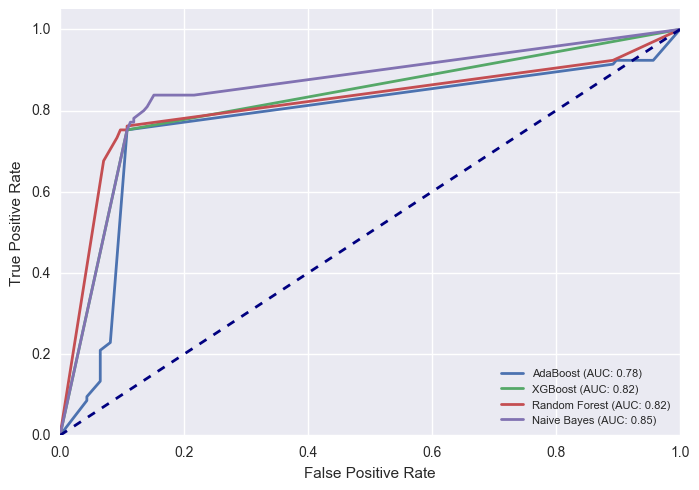

In [785]:
plot_roc_curves(stackers, X_stack_test, Y_test)